# 1. Exploratory data analysis (EDA)

### General EDA Outline
- Preview data
- Check total number of entries and column types
- Check any null values
- Check duplicate entries
- Plot distribution of numeric data (univariate and pairwise joint distribution)
- Plot count distribution of categorical data
- Analyse time series of numeric data by daily, monthly and yearly frequencies

#### Data Preview

In [44]:
import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

import seaborn as sns

import pylab as plot

from scipy import stats

In [45]:
# read in data
train = pd.read_csv(r"C:\Users\johnl\Documents\Supermarket\Train.csv")
test = pd.read_csv(r"C:\Users\johnl\Documents\Supermarket\Test.csv")
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 13)


C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [46]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


### Distribution of Target Variable

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\johnl\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\johnl\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Text(0.5, 1.0, 'Sales distribution')

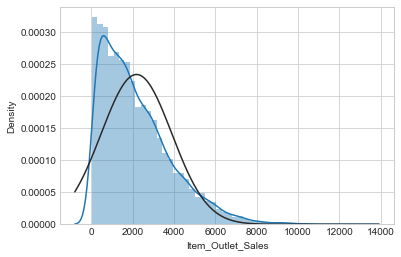

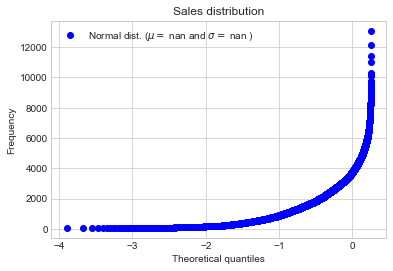

In [47]:

(mu, sigma) =stats.norm.fit(df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(df['Item_Outlet_Sales'], plot=plt)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sales distribution')


In [155]:
print("Skewness: " + str(df['Item_Outlet_Sales'].skew()))
print("Kurtosis: " + str(df['Item_Outlet_Sales'].kurt()))

Skewness: 1.1715869571072295
Kurtosis: 1.6139103805506103


#### What do these values mean?
##### Rules of Thumb for Skewness
1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
2. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
3. If the skewness is less than -1 or greater than 1, the data are highly skewed

As our value is 1.17 we see the data has a high positive skew

##### What is Kurtosis?
- The kurtosis parameter is a measure of the combined weight of the tails relative to the rest of the distribution.
- Kurtosis is all about the tails of the distribution – not the peakedness or flatness.  It measures the tail-heaviness of the distribution.

Kurtosis is usually measured against the normal distribution.  
- If the kurtosis is close to 0, then a normal distribution is often assumed.  These are called mesokurtic distributions.
- If the kurtosis is less than zero, then the distribution is light tails and is called a platykurtic distribution.  
- If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution

The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). George, D., & Mallery, M. (2010).

#### Distribution of Target Variable Analysis

Our Kurtosis value falls within +-2 range however we have a significant skew so we need to normalize the data further

## 1.1. Univariate Analysis


###  Numerical Predictors

Now we will consider our dependent variables. First of all, we will check for the numerical variables in our dataset:

In [49]:
num_features = df.select_dtypes(include=[np.number])
num_features.dtypes

Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
dtype: object

### Correlation between Numerical Predictors and Target variable

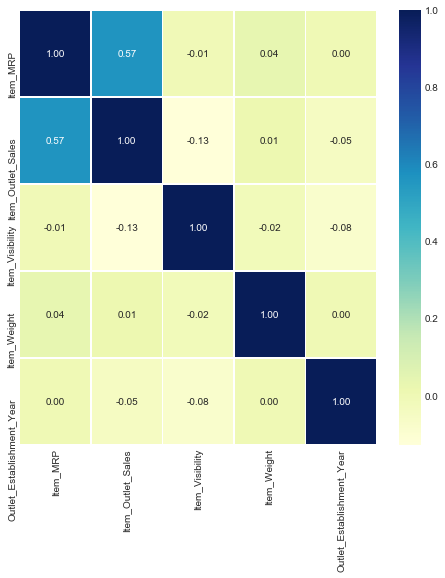

In [50]:
corrmat = num_features.corr()
corrmat
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()


In [51]:
corrmat['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

#### Matrix Analysis
Of the numerical values MRP seems to be the only feature which has a strong correlation with the Sales. <br>
Suprisingly visibility has only a very weak correlation with the sale of an item which seems strange as more visible placement would theoretically increase the sales

### Item Weight

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


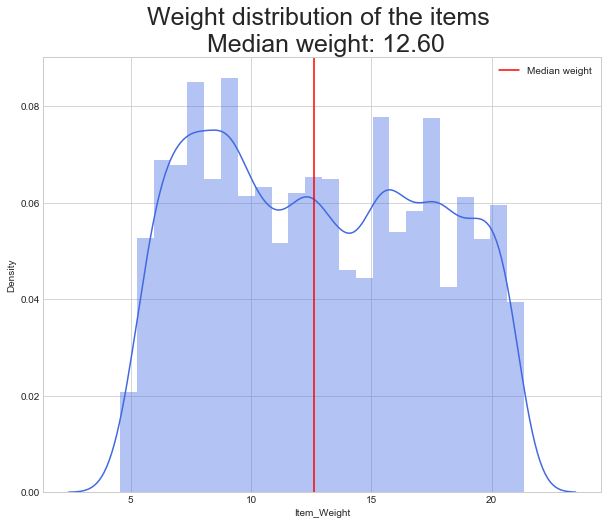

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(df['Item_Weight'].dropna(),color='royalblue')
plt.title('Weight distribution of the items \n Median weight: {0:.2f}'.format(df['Item_Weight'].dropna().median()),size=25)
plt.axvline(df['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()

The distribution of the weight is not normal 

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning

Text(0.5, 1.0, 'Violinplot of weights')

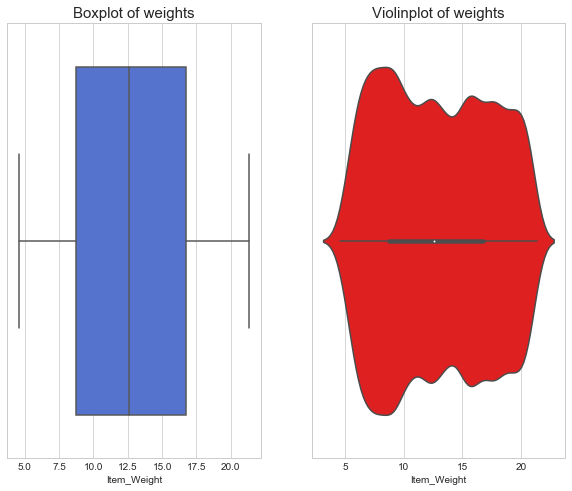

In [53]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(121)
sns.boxplot(df['Item_Weight'],ax=ax1,orient='v',color='royalblue')
ax1.set_title('Boxplot of weights',size=15)

ax2=fig1.add_subplot(122)
sns.violinplot(df['Item_Weight'],ax=ax2,orient='v',color='red')
ax2.set_title('Violinplot of weights',size=15)

As we can see from the above violin and distplot, the curve platueus over a large range of weights. Hence, it is simply not possible for us to assume a weight for the null values. We shall leave them as it is or drop them if it is later deemed to not be too important in our analysis.

### Item MRP

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


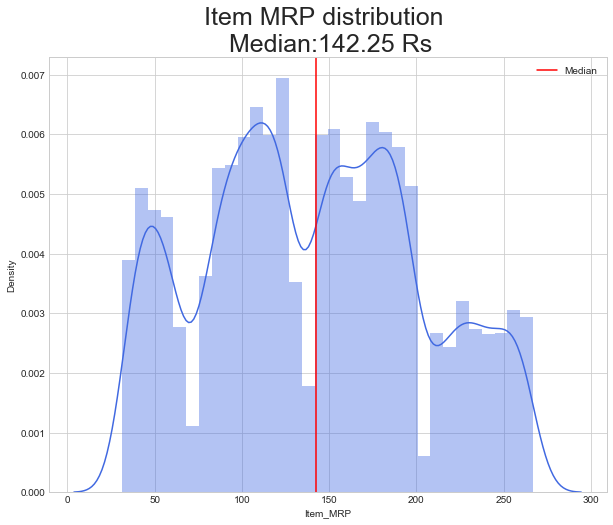

In [54]:
plt.figure(figsize=(10,8))
sns.distplot(df['Item_MRP'],color='royalblue')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(df['Item_MRP'].median()),size=25)
plt.axvline(df['Item_MRP'].median(),color='red',label='Median')
plt.legend()

Text(0.5, 1.0, 'MRP distribution')

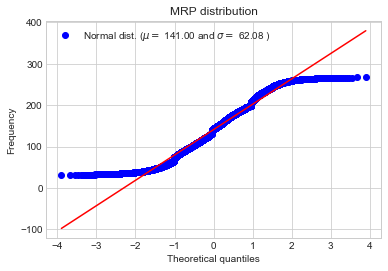

In [55]:
(mu, sigma) =stats.norm.fit(df['Item_MRP'])
res = stats.probplot(df['Item_MRP'], plot=plt)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MRP distribution')



- High standard deviation 
- The graph has multiple distinct peaks
- large number of products whose prices range from 25-75 Rs.
- Highest number of products in the 80-120 Rs range.
- The products increase again from 150-200 Rs range.
- Largenumber of products from 220-240 Rs range aswell.

### Item Visibility

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


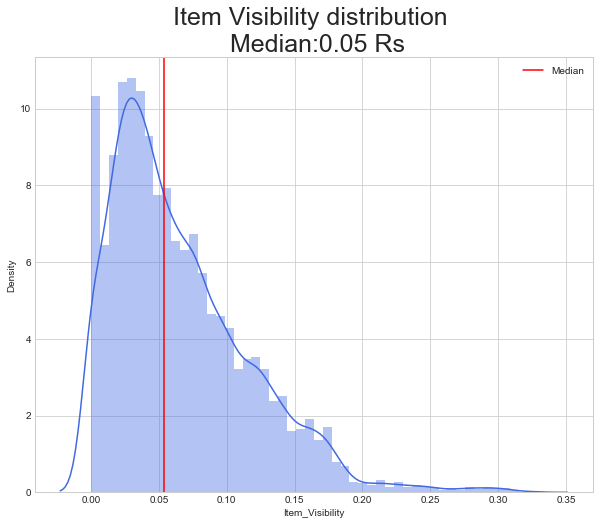

In [56]:
plt.figure(figsize=(10,8))
sns.distplot(df['Item_Visibility'],color='royalblue')
plt.title('Item Visibility distribution \n Median:{0:.2f} Rs'.format(df['Item_Visibility'].median()),size=25)
plt.axvline(df['Item_Visibility'].median(),color='red',label='Median')
plt.legend()

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning

((array([-3.89649086, -3.6760221 , -3.55519365, ...,  3.55519365,
          3.6760221 ,  3.89649086]),
  array([0.        , 0.        , 0.        , ..., 0.32363725, 0.32578081,
         0.32839095])),
 (0.049175892239377204, 0.06595278007399323, 0.9554246884534902))

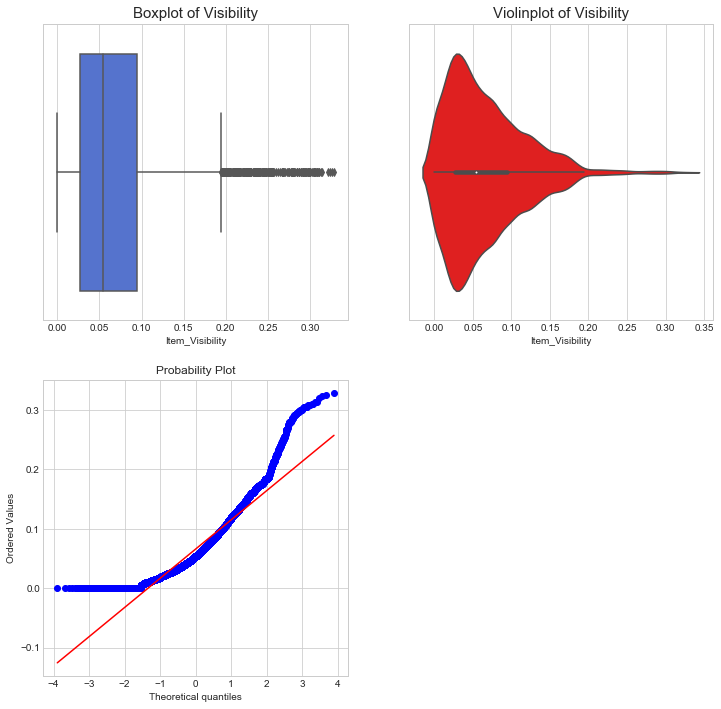

In [57]:
fig1=plt.figure(figsize=(12,12))
ax1=fig1.add_subplot(221)
sns.boxplot(df['Item_Visibility'],ax=ax1,orient='v',color='royalblue')
ax1.set_title('Boxplot of Visibility',size=15)

ax2=fig1.add_subplot(222)
sns.violinplot(df['Item_Visibility'],ax=ax2,orient='v',color='red')
ax2.set_title('Violinplot of Visibility',size=15)
ax2=fig1.add_subplot(223)
stats.probplot(df['Item_Visibility'],plot=ax2)

We can see from our boxplot that above 0.2 the values become outliers and will skew our data, hence they should be tranformed or removed

While there is only one peak there is a signifiant right tail in our distribution

In [58]:
df[df['Item_Visibility']>0.2].shape[0]

240

we have 134 outliers

((array([-3.89235986, -3.67167022, -3.55071089, ...,  3.55071089,
          3.67167022,  3.89235986]),
  array([0.        , 0.        , 0.        , ..., 0.19982599, 0.19993588,
         0.19995527])),
 (0.044386269900009455, 0.06283183548753937, 0.9690147606621354))

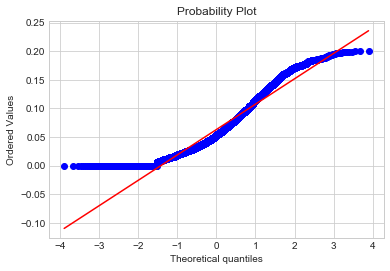

In [59]:
df=df[df['Item_Visibility']<0.2]
stats.probplot(df['Item_Visibility'],plot=plt)

Our plot now follows a more normal distribution 

### Categorical Predictors

### Fat Content

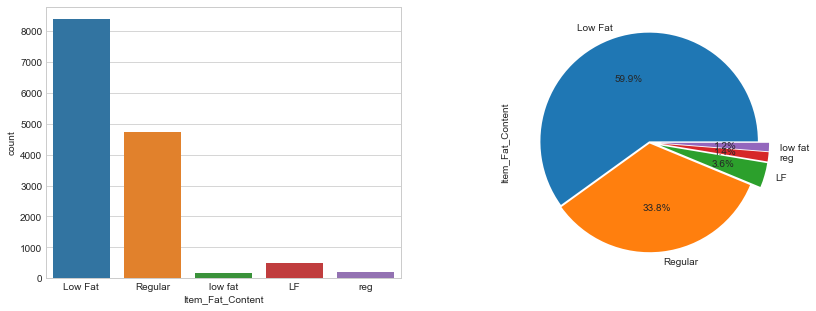

In [60]:
df_fat = df
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Item_Fat_Content',data=df,ax=ax[0])


df_fat.Item_Fat_Content.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.1,0.1,0.1])



We see here we clearly only have 2 catagories but the data is split into 5 so we need to group them 

In [61]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')


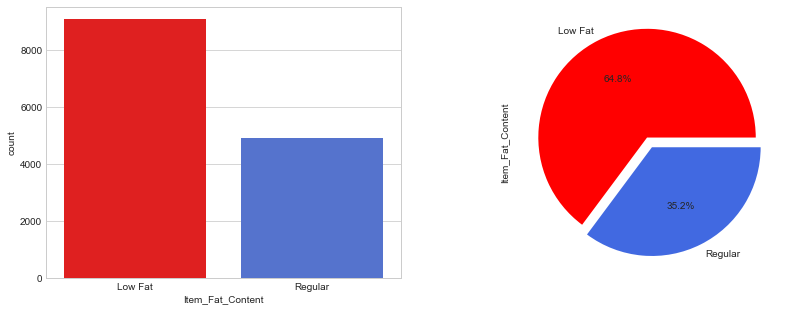

In [62]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Item_Fat_Content',data=df,ax=ax[0],palette = ["red", "royalblue"])


df.Item_Fat_Content.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.05,0.05], colors = ["red", "royalblue"])


### Item Type

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


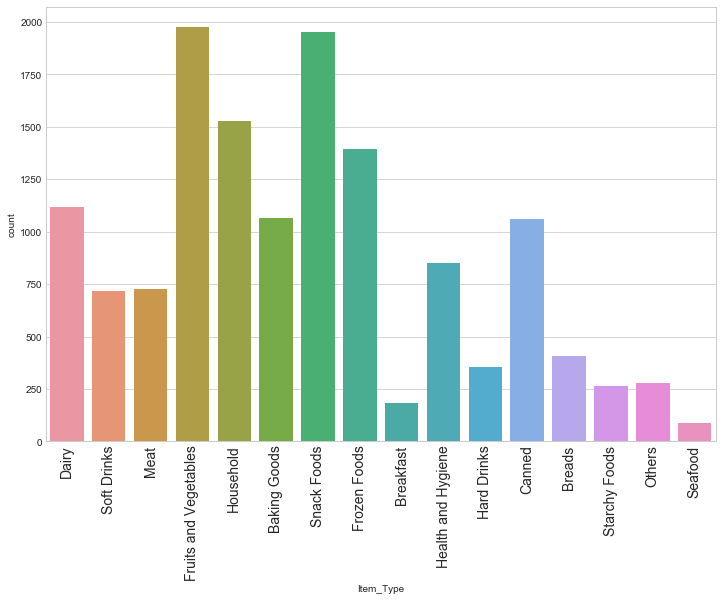

In [63]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df['Item_Type'])

ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation = 90)

plt.legend()

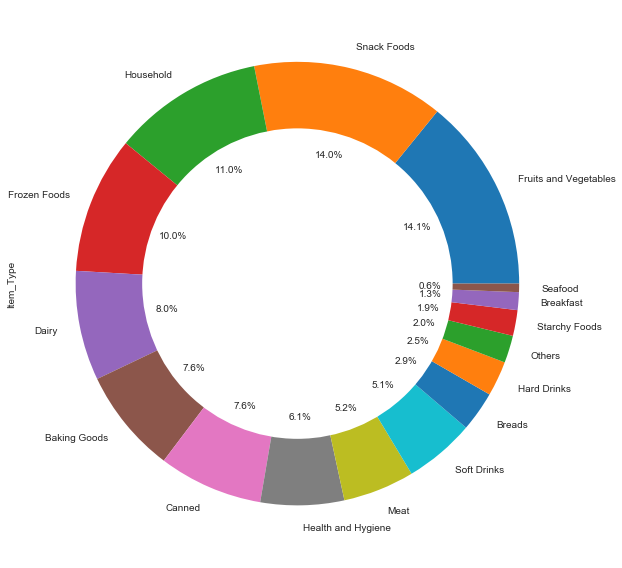

In [64]:
plt.figure(figsize=(12,8))
df.Item_Type.value_counts().plot.pie(autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


### Outlet Size

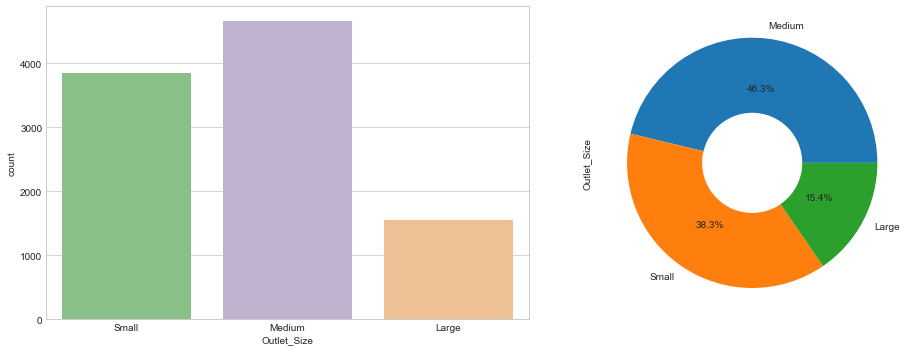

In [65]:
df['Outlet_Size']=df['Outlet_Size'].replace('High','Large')
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Outlet_Size',data=df,ax=ax[0], order = ["Small", "Medium", "Large"], palette= "Accent")


df.Outlet_Size.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Outlet Location Type

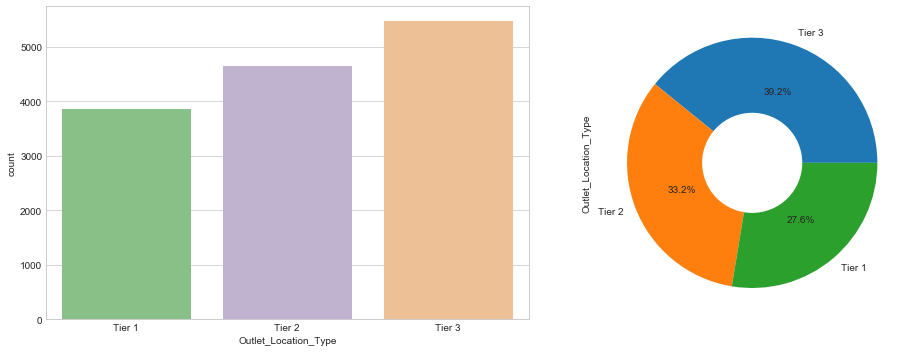

In [66]:

fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Outlet_Location_Type',data=df,ax=ax[0], order = ["Tier 1", "Tier 2", "Tier 3"], palette= "Accent")


df.Outlet_Location_Type.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Outlet Type

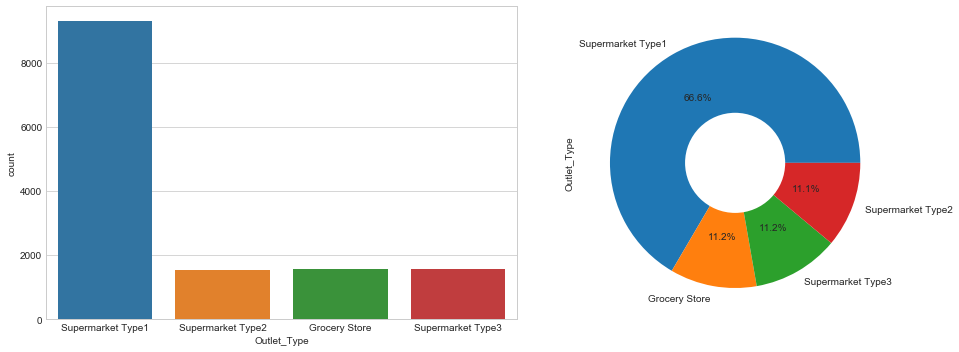

In [67]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Outlet_Type',data=df,ax=ax[0])


df.Outlet_Type.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 1.2. Bivariate Analysis

Here we will focus on the relationship between our target and different predictors

### Impact of Outlet_Type on Item_Outlet_Sales

Text(0.5, 0, 'Item MRP')

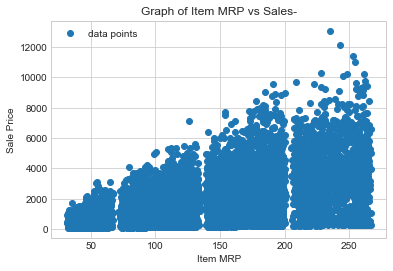

In [68]:

x = df['Item_MRP']
y =  df['Item_Outlet_Sales']
plt.plot(x, y,"o")
#sns.regplot(data = data,x='GrLivArea', y='SalePrice')
#m, b = np.polyfit(x, y, 1)
#m = slope, b=intercept
plt.title("Graph of Item MRP vs Sales-")
plt.legend(["data points", "line of best fit"])
plt.ylabel('Sale Price')
plt.xlabel('Item MRP')

We see 4 clear groups form in our data <br>
General trend of increased sales with increased MRP

### Impact of Outlet_Size on Item_Outlet_Sales

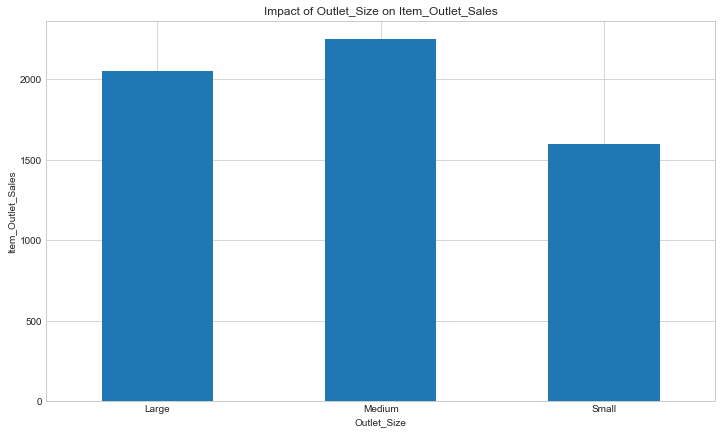

In [69]:
Outlet_Size_pivot = df.groupby(['Outlet_Size'])["Item_Outlet_Sales"].aggregate('median')
Outlet_Size_pivot.plot(kind='bar',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


Suprisingly Medium Outlets seem to have a higher amount of Sales compared to both Large and Small Outlets

### Impact of Outlet_Type on Item_Outlet_Sales

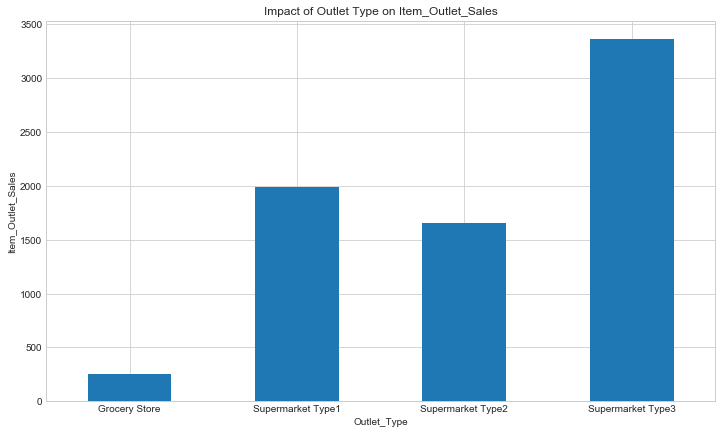

In [70]:
Outlet_Size_pivot = df.groupby(['Outlet_Type'])["Item_Outlet_Sales"].aggregate('median')
Outlet_Size_pivot.plot(kind='bar',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


All Supermarket types seem to be more profitable than grocery store

### Impact of Fat Content on Sales

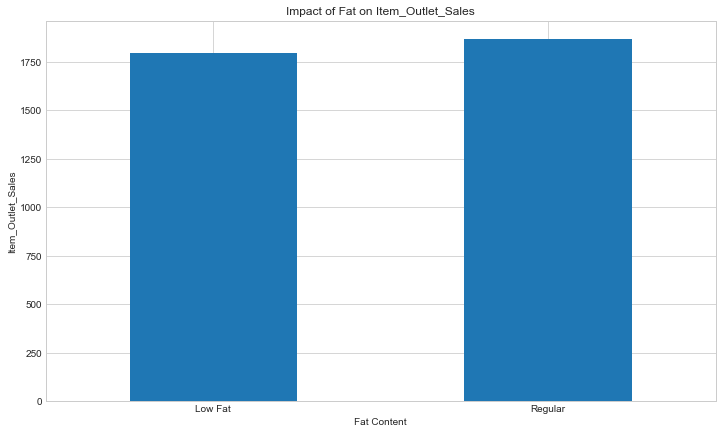

In [71]:
Outlet_Size_pivot = df.groupby(['Item_Fat_Content'])["Item_Outlet_Sales"].aggregate('median')
Outlet_Size_pivot.plot(kind='bar',figsize=(12,7))

plt.xlabel("Fat Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Fat on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Regular fat content seems to have marginally higher sales however the difference is small

### Impact of Item_Visibility and Item_Outlet_Sales

C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Item Visibility')

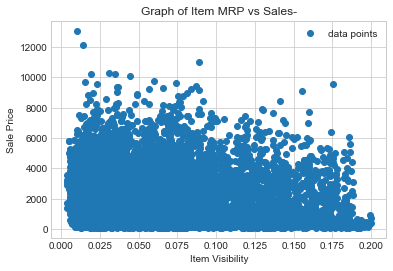

In [72]:
df.vis = df
df.vis = df.drop(df[df.Item_Visibility == 0].index)
x = df.vis['Item_Visibility']
y =  df.vis['Item_Outlet_Sales']

plt.plot(x, y,"o")

plt.title("Graph of Item MRP vs Sales-")
plt.legend(["data points", "line of best fit"])
plt.ylabel('Sale Price')
plt.xlabel('Item Visibility')

Surprisingly there seems to be a negative relationship between sales and visibility which doesnt make much sense

### Impact of item weight on sales

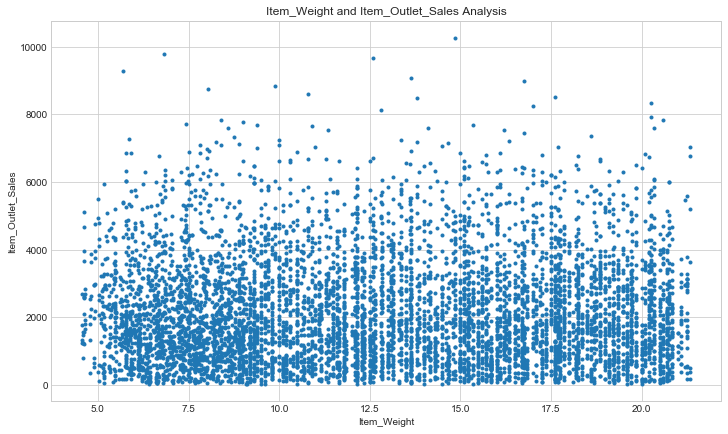

In [73]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Weight, df["Item_Outlet_Sales"],'.')

Doesnt seem to be a relationship between weight and sales

## Data Pre Processing

For the Outlet Size we will apply the mode of each type of Outlet for the missing values of the Outlet Size feature

In [74]:
#Import mode function:
from scipy.stats import mode 
#Determing the mode for each
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())

outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [75]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    
    
    if pd.isnull(Size):
        
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

df['Outlet_Size'] = df[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)


In [76]:
visibility_avg = df.pivot_table(values='Item_Visibility',index='Item_Identifier')

#Impute 0 values with mean visibility of that product
missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))

Number of 0 values initially: 879


In [77]:
#Impute 0 values with mean visibility of that product
missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))

df.loc[missing_values,'Item_Visibility'] = df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

print ('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [78]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10005
Non-Consumable     2658
Drinks             1301
Name: Item_Type_Combined, dtype: int64

In [79]:
#Mark non-consumables as separate category in low_fat:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6393
Regular       4913
Non-Edible    2658
Name: Item_Fat_Content, dtype: int64

In [80]:
#One Hot Coding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [81]:
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Large,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [82]:
#Drop the columns which have been converted to different types:
df.drop('Item_Type',axis=1,inplace=True)

In [83]:

#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)



C:\Users\johnl\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [84]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales
base1


C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2210.748304
8524,FDW14,OUT017,2210.748304
8525,NCN55,OUT010,2210.748304
8526,FDQ58,OUT017,2210.748304
8527,FDY38,OUT027,2210.748304
8528,FDH56,OUT046,2210.748304
8529,FDL48,OUT018,2210.748304
8530,FDC48,OUT027,2210.748304
8531,FDN33,OUT045,2210.748304
8532,FDA36,OUT017,2210.748304


# Model

In [85]:
from sklearn.model_selection import train_test_split
df = df[df['Item_Outlet_Sales'].notnull()]
x = df.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier','source', 'Item_Weight'], axis=1)
y = df.Item_Outlet_Sales

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


## 1. Linear Regression

In [87]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr= LinearRegression()
lr.fit(x_train, y_train)
lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)

lr_pred_train
mse_train = mean_squared_error(y_train,lr_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,lr_pred_test)
rmse_score_test=np.sqrt(mse_test)
#print(lr_score_test)
(rmse_score_train)

1128.573215285943

In [88]:
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(lr,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(lr,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1131.0179253251486
41.9740147192018
1142.6596428229211
50.333011214896025


In [90]:
from sklearn.metrics import accuracy_score
train_score = lr.score(x_train,y_train) * 100
test_score = lr.score(x_test,y_test)*100
results_df = pd.DataFrame(data=[["Linear Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df

,Model,Training Accuracy %,RMSE Train,Cross Val RSME Mean Train,Cross Val RSME Std Train,Testing Accuracy %,RMSE Test,Cross Val RSME Mean Test,Cross Val RSME Std Test
0,Linear Regression,56.307372,1128.573215,1131.017925,41.974015,54.873006,1138.111448,1142.659643,50.333011


C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Linear Regression \n RMSE: 1138.11')

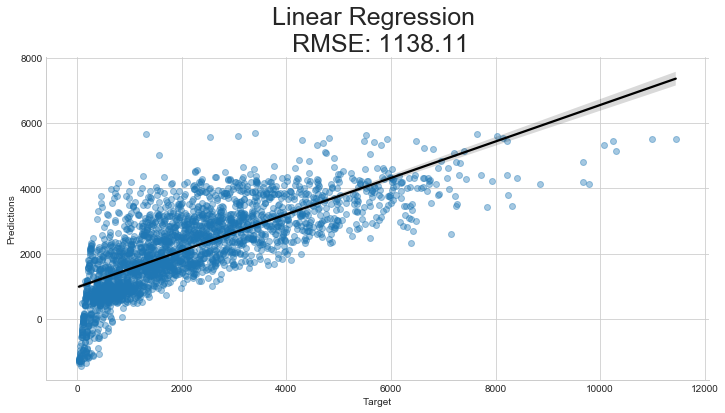

In [91]:

reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=lr_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)



As we can see, the linear regression couldn't do a great job. The values are too scattered away from the black line which is the ideal region of the scatters. The RMSE is quite high too. Hence, it will definitely be a good option to check for regression techniques utilising a regularisation parameter such as Lasso and Ridge regression.

## Ridge Regression

In [92]:

from sklearn.linear_model import Ridge
r=Ridge()
r.fit(x_train, y_train)
r_pred_train = r.predict(x_train)
r_pred_test = r.predict(x_test)


mse_train = mean_squared_error(y_train,r_pred_train)
rmse_score_train=np.sqrt(mse_train)
print(rmse_score_train)
mse_test=mean_squared_error(y_test,r_pred_test)
rmse_score_test=np.sqrt(mse_test)
print(rmse_score_test)
(rmse_score_train)



1128.574033941731
1138.0894330336562


1128.574033941731

In [93]:
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(r,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(r,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1130.9886904550956
41.93261688907666
1142.5921117940484
50.41178569696218


In [94]:
from sklearn.metrics import accuracy_score
train_score = r.score(x_train,y_train) * 100
test_score = r.score(x_test,y_test)*100
results_df_2 = pd.DataFrame(data=[["Ridge Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_2, ignore_index=True)


C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Ridge Regression \n RMSE: 1138.09')

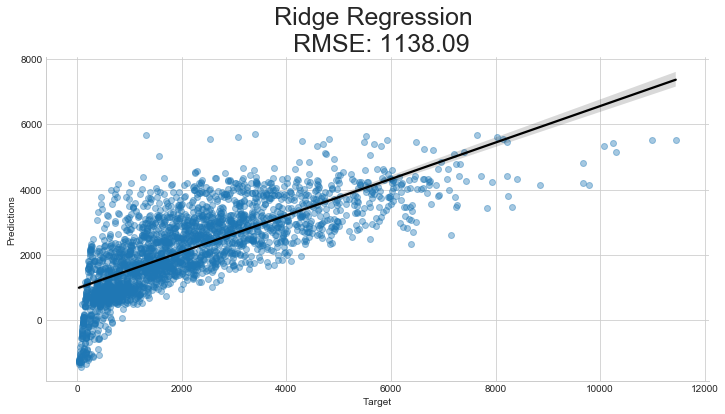

In [95]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=r_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Ridge Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)


Our Ridge regression is basically identical to our Linear Regression

## Lasso

In [96]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(x_train, y_train)
l_pred_train = l.predict(x_train)
l_pred_test = l.predict(x_test)


mse_train = mean_squared_error(y_train,l_pred_train)
rmse_score_train=np.sqrt(mse_train)
print(rmse_score_train)
mse_test=mean_squared_error(y_test,l_pred_test)
rmse_score_test=np.sqrt(mse_test)
print(rmse_score_test)
(rmse_score_train)



1128.573245487812
1138.1084343293076


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3337582244.0406766, tolerance: 1711738.2477973404
  positive)


1128.573245487812

In [97]:
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(l,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(l,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2978519753.2308254, tolerance: 1537696.9416519408
  positive)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985262011.5180173, tolerance: 1538474.662273603
  positive)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2978511034.4196796, tolerance: 1542378.527185746
  positive)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

1131.0173609965111
41.97272887073806


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1276152598.6116128, tolerance: 635127.8150538936
  positive)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1310403458.9424062, tolerance: 663367.7723327932
  positive)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294439728.4586022, tolerance: 651800.7260309719
  positive)


1142.6477636087254
50.33214551789047


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1293093141.5404317, tolerance: 644038.1957823238
  positive)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1304054340.2249079, tolerance: 648318.7511182933
  positive)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279166701.5418928, tolerance: 654872.0814888816
  positive)


In [98]:
train_score = l.score(x_train,y_train) * 100
test_score = l.score(x_test,y_test)*100
results_df_3 = pd.DataFrame(data=[["Lasso Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_3, ignore_index=True)


In [99]:
results_df

,Model,Training Accuracy %,RMSE Train,Cross Val RSME Mean Train,Cross Val RSME Std Train,Testing Accuracy %,RMSE Test,Cross Val RSME Mean Test,Cross Val RSME Std Test
0,Linear Regression,56.307372,1128.573215,1131.017925,41.974015,54.873006,1138.111448,1142.659643,50.333011
1,Ridge Regression,56.307308,1128.574034,1130.988690,41.932617,54.874752,1138.089433,1142.592112,50.411786
2,Lasso Regression,56.307369,1128.573245,1131.017361,41.972729,54.873245,1138.108434,1142.647764,50.332146


C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Lasso Regression \n RMSE: 1138.11')

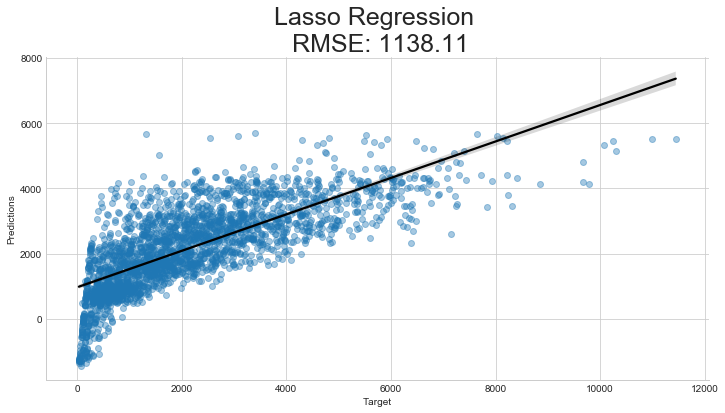

In [100]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=l_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Lasso Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

## Elastic Net

In [101]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01,l1_ratio=0.5)


en.fit(x_train, y_train)
en_pred_train = en.predict(x_train)
en_pred_test = en.predict(x_test)

en_pred_train
mse_train = mean_squared_error(y_train,en_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,en_pred_test)
rmse_score_test=np.sqrt(mse_test)



In [102]:

score_train=cross_val_score(en,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(en,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1130.9208527363703
41.52164335792514
1142.4048907530496
51.26442199392738


In [103]:
train_score = en.score(x_train,y_train) * 100
test_score = en.score(x_test,y_test)*100
results_df_4 = pd.DataFrame(data=[["Elastic Net Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_4, ignore_index=True)

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Elastic Net Regression \n RMSE: 1137.93')

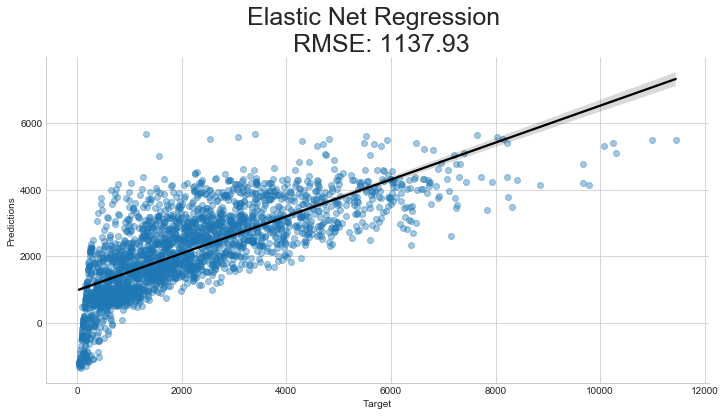

In [104]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=en_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Elastic Net Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

In [105]:
from sklearn.svm import SVR
svm=SVR(epsilon=15,kernel='linear')

svm.fit(x_train, y_train)
svm_pred_train = svm.predict(x_train)
svm_pred_test = svm.predict(x_test)


mse_train = mean_squared_error(y_train,svm_pred_train)
rmse_score_train=np.sqrt(mse_train)
print(rmse_score_train)
mse_test=mean_squared_error(y_test,svm_pred_test)
rmse_score_test=np.sqrt(mse_test)
print(rmse_score_test)
(rmse_score_train)

1215.4537847116665
1215.799942379638


1215.4537847116665

In [106]:
score_train=cross_val_score(svm,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(svm,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1224.3050009645387
38.80501809621026
1282.9252258083195
84.57640127217728


## Decision Tree

In [107]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_pred_train = dtr.predict(x_train)
dtr_pred_test = dtr.predict(x_test)

dtr_pred_train
mse_train = mean_squared_error(y_train,dtr_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,dtr_pred_test)
rmse_score_test=np.sqrt(mse_test)


In [108]:

score_train=cross_val_score(dtr,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(dtr,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1536.9793581886045
65.42305853586677
1578.3362282977043
97.64672264649589


In [109]:
train_score = dtr.score(x_train,y_train) * 100
test_score = dtr.score(x_test,y_test)*100
results_df_5 = pd.DataFrame(data=[["Decision Tree Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_5, ignore_index=True)

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Decision Tree Regression \n RMSE: 1547.03')

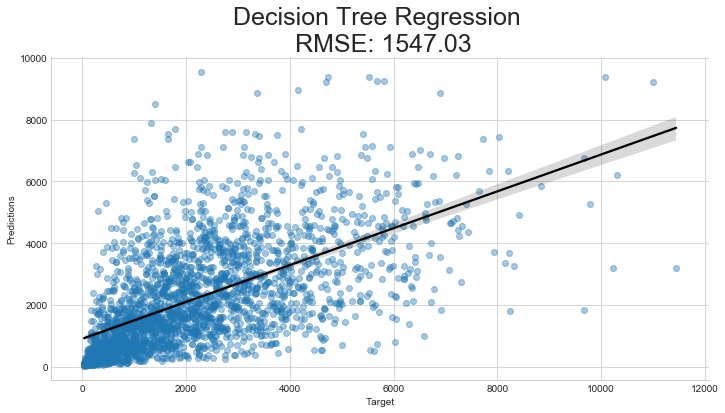

In [110]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=dtr_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Decision Tree Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

In [111]:
results_df

,Model,Training Accuracy %,RMSE Train,Cross Val RSME Mean Train,Cross Val RSME Std Train,Testing Accuracy %,RMSE Test,Cross Val RSME Mean Test,Cross Val RSME Std Test
0,Linear Regression,56.307372,1128.573215,1131.017925,41.974015,54.873006,1138.111448,1142.659643,50.333011
1,Ridge Regression,56.307308,1128.574034,1130.988690,41.932617,54.874752,1138.089433,1142.592112,50.411786
2,Lasso Regression,56.307369,1128.573245,1131.017361,41.972729,54.873245,1138.108434,1142.647764,50.332146
3,Elastic Net Regression,56.293268,1128.755349,1130.920853,41.521643,54.887569,1137.927793,1142.404891,51.264422
4,Decision Tree Regression,100.000000,0.000000,1536.979358,65.423059,16.619466,1547.030682,1578.336228,97.646723


## Random Forest 

In [112]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred_train = rfr.predict(x_train)
rfr_pred_test = rfr.predict(x_test)

rfr_pred_train
mse_train = mean_squared_error(y_train,rfr_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,rfr_pred_test)
rmse_score_test=np.sqrt(mse_test)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [113]:

score_train=cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(rfr,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1189.9940583427028
41.35037771044294
1223.5768679388707
53.68655660943287


In [114]:
train_score = rfr.score(x_train,y_train) * 100
test_score = rfr.score(x_test,y_test)*100
results_df_6 = pd.DataFrame(data=[["Random Forest Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_6, ignore_index=True)

In [ ]:
'''
## Big boy function 
def MachineLearningFunc(lst):
    results_df = pd.DataFrame(columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
    i=0
    for alg in lst:
        i+=1
        alg.fit(x_train, y_train)
        alg_pred_train = alg.predict(x_train)
        alg_pred_test = alg.predict(x_test)

        alg_pred_train
        mse_train = mean_squared_error(y_train,alg_pred_train)
        rmse_score_train=np.sqrt(mse_train)

        mse_test=mean_squared_error(y_test,rfr_pred_test)
        rmse_score_test=np.sqrt(mse_test)
        
        score_train=cross_val_score(alg,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
        score_cross_train=np.sqrt(-score_train)
        mean_score_cross_train = np.mean(score_cross_train)
        std_score_cross_train = np.std(score_cross_train)
        print(mean_score_cross_train)
        print(std_score_cross_train)


        score_test=cross_val_score(alg,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
        score_cross_test=np.sqrt(-score_test)
        mean_score_cross_test = np.mean(score_cross_test)
        std_score_cross_test = np.std(score_cross_test)
        print(mean_score_cross_test)
        print(std_score_cross_test)
        train_score = rfr.score(x_train,y_train) * 100
        test_score = rfr.score(x_test,y_test)*100
        row =[str(alg)+ " Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]
        results_df.loc[i] = row
        
    return results_df
        
x = [rfr,dtr,lr]
MachineLearningFunc(x)
'''

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Random Forest Regression \n RMSE: 1198.72')

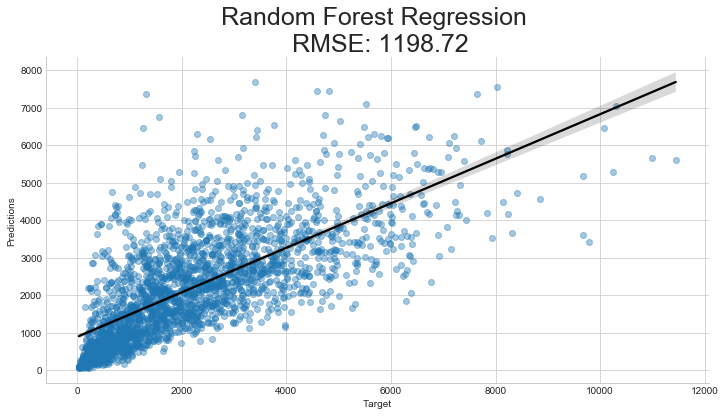

In [115]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=rfr_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Random Forest Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

## Bagging 

In [116]:
from sklearn.ensemble import BaggingRegressor

In [117]:


br = BaggingRegressor()
br.fit(x_train, y_train)
br_pred_train = br.predict(x_train)
br_pred_test = br.predict(x_test)

br_pred_train
mse_train = mean_squared_error(y_train,br_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,br_pred_test)
rmse_score_test=np.sqrt(mse_test)

In [118]:

score_train=cross_val_score(br,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(br,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1202.3215988274558
37.55931648820668
1202.2138123759537
57.639020991472925


In [119]:
train_score = br.score(x_train,y_train) * 100
test_score = br.score(x_test,y_test)*100
results_df_7 = pd.DataFrame(data=[["Bagging Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_7, ignore_index=True)

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Bagging Regression \n RMSE: 1199.13')

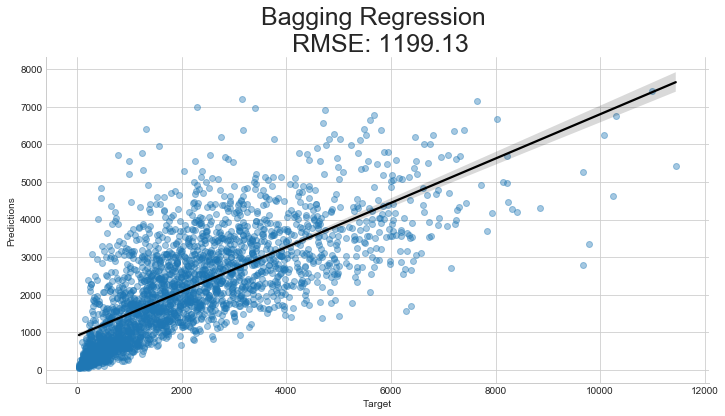

In [120]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=br_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Bagging Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

In [121]:
results_df

,Model,Training Accuracy %,RMSE Train,Cross Val RSME Mean Train,Cross Val RSME Std Train,Testing Accuracy %,RMSE Test,Cross Val RSME Mean Test,Cross Val RSME Std Test
0,Linear Regression,56.307372,1128.573215,1131.017925,41.974015,54.873006,1138.111448,1142.659643,50.333011
1,Ridge Regression,56.307308,1128.574034,1130.988690,41.932617,54.874752,1138.089433,1142.592112,50.411786
2,Lasso Regression,56.307369,1128.573245,1131.017361,41.972729,54.873245,1138.108434,1142.647764,50.332146
3,Elastic Net Regression,56.293268,1128.755349,1130.920853,41.521643,54.887569,1137.927793,1142.404891,51.264422
4,Decision Tree Regression,100.000000,0.000000,1536.979358,65.423059,16.619466,1547.030682,1578.336228,97.646723
5,Random Forest Regression,91.402441,500.625817,1189.994058,41.350378,49.938685,1198.719905,1223.576868,53.686557
6,Bagging Regression,91.180516,507.045872,1202.321599,37.559316,49.904240,1199.132231,1202.213812,57.639021


## Adaptive Boosting

In [122]:
from sklearn.ensemble import AdaBoostRegressor


ab = AdaBoostRegressor()
ab.fit(x_train, y_train)
ab_pred_train = ab.predict(x_train)
ab_pred_test = ab.predict(x_test)

ab_pred_train
mse_train = mean_squared_error(y_train,ab_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,ab_pred_test)
rmse_score_test=np.sqrt(mse_test)


In [123]:
score_train=cross_val_score(ab,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(ab,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1291.99878924624
79.78845791909193
1273.8722401349664
85.1736959198332


In [124]:
train_score = ab.score(x_train,y_train) * 100
test_score = ab.score(x_test,y_test)*100
results_df_8 = pd.DataFrame(data=[["Adaptive Boosting Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_8, ignore_index=True)

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Adaptive Boosting Regression \n RMSE: 1447.98')

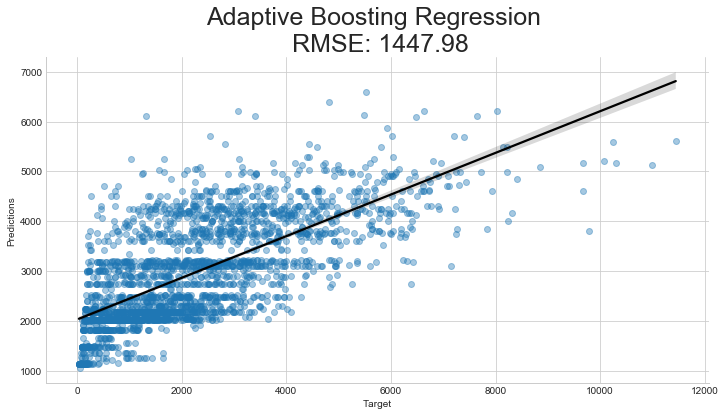

In [125]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=ab_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Adaptive Boosting Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

## Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

gbr =  GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_pred_train = gbr.predict(x_train)
gbr_pred_test = gbr.predict(x_test)

gbr_pred_train
mse_train = mean_squared_error(y_train,gbr_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,gbr_pred_test)
rmse_score_test=np.sqrt(mse_test)

In [127]:
score_train=cross_val_score(gbr,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(gbr,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1094.637912975628
41.9146691152863
1106.9849064043287
46.60239906181377


In [128]:
train_score = gbr.score(x_train,y_train) * 100
test_score = gbr.score(x_test,y_test)*100
results_df_9 = pd.DataFrame(data=[["Gradient Boosting Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_9, ignore_index=True)

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'Gradient Boosting Regression \n RMSE: 1098.14')

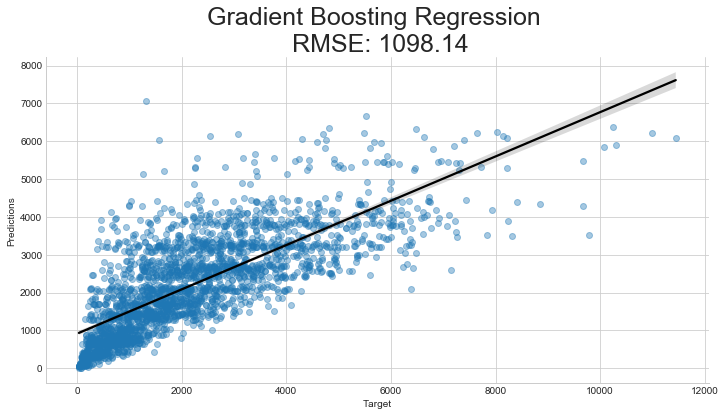

In [129]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=gbr_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Gradient Boosting Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

## xgboost

In [130]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred_train = xgb.predict(x_train)
xgb_pred_test = xgb.predict(x_test)

xgb_pred_train
mse_train = mean_squared_error(y_train,xgb_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,xgb_pred_test)
rmse_score_test=np.sqrt(mse_test)


C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [131]:
score_train=cross_val_score(xgb,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(xgb,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

1175.5428221504562
37.21610580527285


C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

1226.1965416356013
46.83822214784897


C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [ ]:
train_score = xgb.score(x_train,y_train) * 100
test_score = xgb.score(x_test,y_test)*100
results_df_10 = pd.DataFrame(data=[["XGB Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_10, ignore_index=True)

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'XGB Regression \n RMSE: 1163.98')

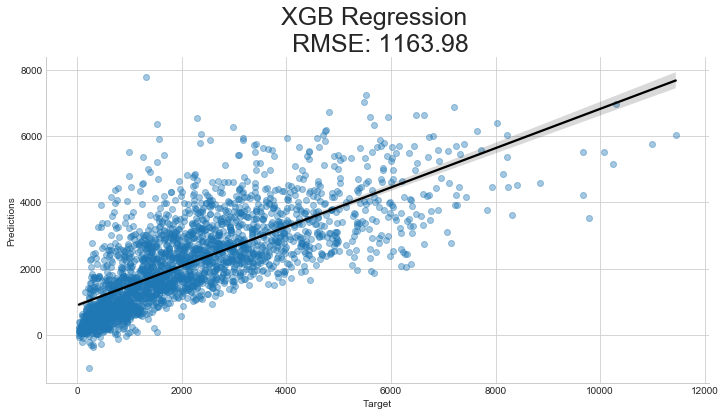

In [132]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=xgb_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('XGB Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

In [133]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)
lgbm_pred_train = lgbm.predict(x_train)
lgbm_pred_test = lgbm.predict(x_test)

lgbm_pred_train
mse_train = mean_squared_error(y_train,lgbm_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,lgbm_pred_test)
rmse_score_test=np.sqrt(mse_test)


In [134]:
score_train=cross_val_score(lgbm,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_train=np.sqrt(-score_train)
mean_score_cross_train = np.mean(score_cross_train)
std_score_cross_train = np.std(score_cross_train)
print(mean_score_cross_train)
print(std_score_cross_train)


score_test=cross_val_score(lgbm,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
score_cross_test=np.sqrt(-score_test)
mean_score_cross_test = np.mean(score_cross_test)
std_score_cross_test = np.std(score_cross_test)
print(mean_score_cross_test)
print(std_score_cross_test)

1124.8753791379154
37.34502530748481
1169.4505351010782
39.30012393723553


In [135]:
train_score = lgbm.score(x_train,y_train) * 100
test_score = lgbm.score(x_test,y_test)*100
results_df_11 = pd.DataFrame(data=[["LGBM Regression", train_score,rmse_score_train,mean_score_cross_train,std_score_cross_train,test_score,rmse_score_test,mean_score_cross_test,std_score_cross_test]], 
                          columns=['Model', 'Training Accuracy %','RMSE Train','Cross Val RSME Mean Train','Cross Val RSME Std Train','Testing Accuracy %','RMSE Test' ,'Cross Val RSME Mean Test','Cross Val RSME Std Test'])
results_df =  results_df.append(results_df_11, ignore_index=True)

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'LGBM Regression \n RMSE: 1125.87')

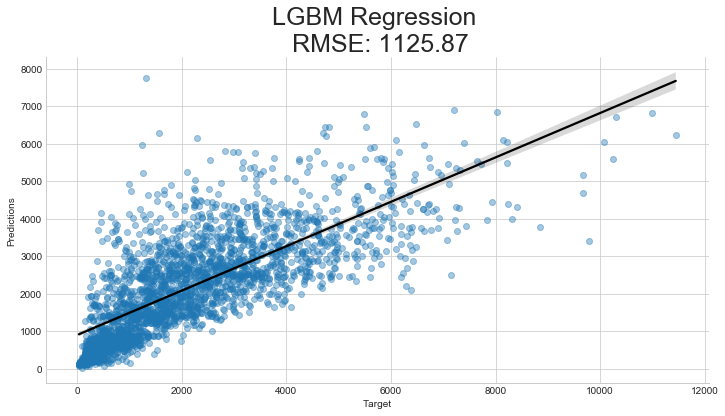

In [136]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=lgbm_pred_test

sns.lmplot('Target','Predictions',data=reg_lin_df,height=5,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('LGBM Regression \n RMSE: {0:.2f}'.format(rmse_score_test),size=25)

In [137]:
results_df

,Model,Training Accuracy %,RMSE Train,Cross Val RSME Mean Train,Cross Val RSME Std Train,Testing Accuracy %,RMSE Test,Cross Val RSME Mean Test,Cross Val RSME Std Test
0,Linear Regression,56.307372,1128.573215,1131.017925,41.974015,54.873006,1138.111448,1142.659643,50.333011
1,Ridge Regression,56.307308,1128.574034,1130.988690,41.932617,54.874752,1138.089433,1142.592112,50.411786
2,Lasso Regression,56.307369,1128.573245,1131.017361,41.972729,54.873245,1138.108434,1142.647764,50.332146
3,Elastic Net Regression,56.293268,1128.755349,1130.920853,41.521643,54.887569,1137.927793,1142.404891,51.264422
4,Decision Tree Regression,100.000000,0.000000,1536.979358,65.423059,16.619466,1547.030682,1578.336228,97.646723
5,Random Forest Regression,91.402441,500.625817,1189.994058,41.350378,49.938685,1198.719905,1223.576868,53.686557
6,Bagging Regression,91.180516,507.045872,1202.321599,37.559316,49.904240,1199.132231,1202.213812,57.639021
7,Adaptive Boosting Regression,32.040003,1407.512727,1291.998789,79.788458,26.954684,1447.980716,1273.872240,85.173696
8,Gradient Boosting Regression,63.667051,1029.143597,1094.637913,41.914669,57.987519,1098.135054,1106.984906,46.602399
9,LGBM Regression,71.513213,911.270664,1124.875379,37.345025,55.838744,1125.867548,1169.450535,39.300124


In [140]:
sorted_df = results_df.sort_values(by=['Testing Accuracy %'], ascending=False)
sorted_df

,Model,Training Accuracy %,RMSE Train,Cross Val RSME Mean Train,Cross Val RSME Std Train,Testing Accuracy %,RMSE Test,Cross Val RSME Mean Test,Cross Val RSME Std Test
8,Gradient Boosting Regression,63.667051,1029.143597,1094.637913,41.914669,57.987519,1098.135054,1106.984906,46.602399
9,LGBM Regression,71.513213,911.270664,1124.875379,37.345025,55.838744,1125.867548,1169.450535,39.300124
3,Elastic Net Regression,56.293268,1128.755349,1130.920853,41.521643,54.887569,1137.927793,1142.404891,51.264422
1,Ridge Regression,56.307308,1128.574034,1130.988690,41.932617,54.874752,1138.089433,1142.592112,50.411786
2,Lasso Regression,56.307369,1128.573245,1131.017361,41.972729,54.873245,1138.108434,1142.647764,50.332146
0,Linear Regression,56.307372,1128.573215,1131.017925,41.974015,54.873006,1138.111448,1142.659643,50.333011
5,Random Forest Regression,91.402441,500.625817,1189.994058,41.350378,49.938685,1198.719905,1223.576868,53.686557
6,Bagging Regression,91.180516,507.045872,1202.321599,37.559316,49.904240,1199.132231,1202.213812,57.639021
7,Adaptive Boosting Regression,32.040003,1407.512727,1291.998789,79.788458,26.954684,1447.980716,1273.872240,85.173696
4,Decision Tree Regression,100.000000,0.000000,1536.979358,65.423059,16.619466,1547.030682,1578.336228,97.646723


In [141]:
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gb,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=7,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_no_change=None,
               

In [150]:

gs.fit(x_train, y_train)
gs_pred_train = gs.predict(x_train)
gs_pred_test = gs.predict(x_test)

gs_pred_train
mse_train = mean_squared_error(y_train,gs_pred_train)
rmse_score_train=np.sqrt(mse_train)

mse_test=mean_squared_error(y_test,gs_pred_test)
rmse_score_test=np.sqrt(mse_test)

In [151]:
train_score = lgbm.score(x_train,y_train) * 100
test_score = lgbm.score(x_test,y_test)*100